### Initial Setup

In [1]:
#importing libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
#setting up path variables
vis_path = '../4_Analysis/3_Visualizations'
prep_data_path = '../2_Data/2_Prepared_Data'

In [3]:
#importing most recent pickle file into working dataframe
df_orders_products_merged = pd.read_pickle(os.path.join(prep_data_path, 'orders_products_labeled_v2.pkl'))

### Bar Charts

<Axes: xlabel='orders_day_of_week'>

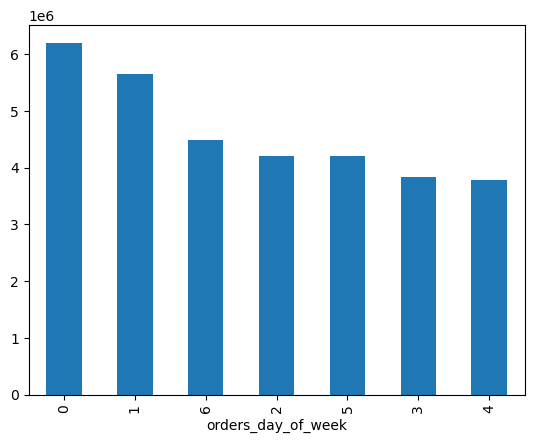

In [4]:
#plotting a bar chart
df_orders_products_merged['orders_day_of_week'].value_counts().plot.bar()

<Axes: xlabel='orders_day_of_week'>

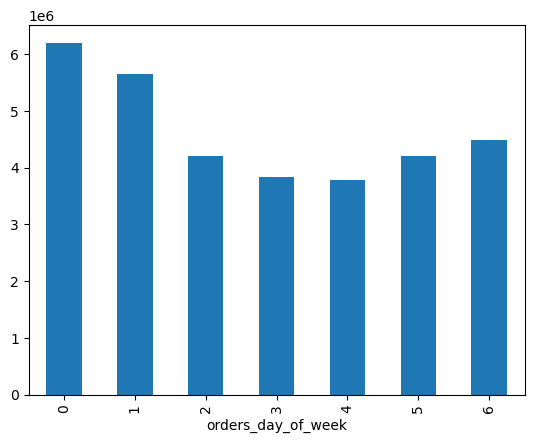

In [5]:
#new bar chart without sorting by values, keeping the sort by the index
df_orders_products_merged['orders_day_of_week'].value_counts().sort_index().plot.bar()

In [6]:
#defining a dictionary for proper labeling the x-axis on the charts

dict_dow = {0:'Sat' , 1:'Sun', 2:'Mon', 3:'Tue', 4:'Wed', 5:'Thu', 6:'Fri'}

In [7]:
# defining a dataframe with the values intended to enter in the visualization

df_to_display = df_orders_products_merged['orders_day_of_week'].value_counts().sort_index().rename(dict_dow)

Text(0.5, 1.0, 'Distribution of orders across the week')

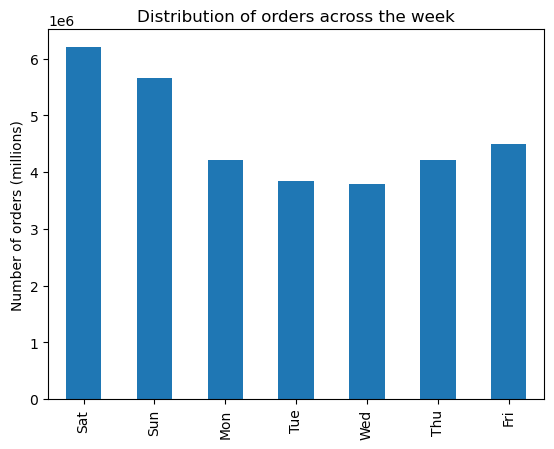

In [8]:
# assign the dataframe plot to an object ax, improving visual aspect (title and axis labels)

bar_chart = df_to_display.plot.bar()
bar_chart.set_ylabel('Number of orders (millions)')
bar_chart.set_xlabel('')
bar_chart.set_title('Distribution of orders across the week')

In [9]:
#improving visual aspect (give a title, rename axis labels) to the chart and save it

bar_chart.figure.savefig(os.path.join(vis_path, 'basic', 'bar_orders_dow.png'))

### Histograms

<Axes: ylabel='Frequency'>

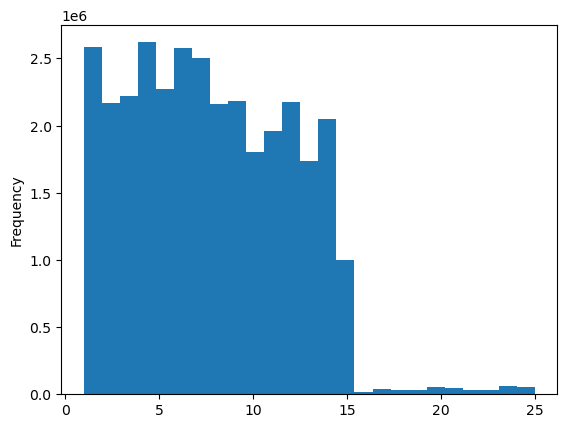

In [10]:
#histogram of prices
df_orders_products_merged['prices'].plot.hist(bins = 25)

I didn't get the result mentioned in the exercise because I already cleaned up the outliers with values 14900.00 and 99999.00 in prices column. While I followed the explanation of the exercise, I'm not applying it here because I corrected already products dataset.

<Axes: ylabel='Frequency'>

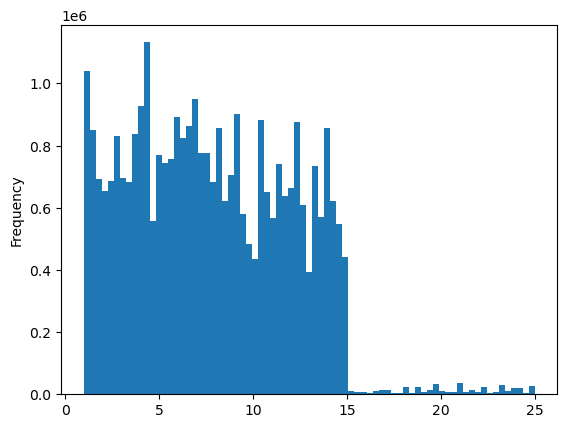

In [11]:
#histogram of prices with bigger granularity
df_orders_products_merged['prices'].plot.hist(bins = 75)

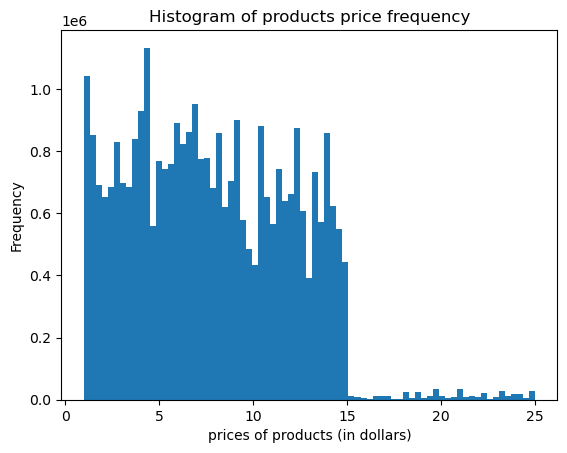

In [12]:
#assigning plot to a variable and storing it
hist = df_orders_products_merged['prices'].plot.hist(bins = 75)
hist.set_xlabel('prices of products (in dollars)')
hist.set_title('Histogram of products price frequency')
hist.figure.savefig(os.path.join(vis_path, 'basic', 'histogram_prices.png'))

### Line Charts

In [13]:
#starting by creating random slices (70/30 percent)
np.random.seed(4)
dev = np.random.rand(len(df_orders_products_merged)) <= 0.7

In [14]:
#store each slice in its own dataframe

df_big = df_orders_products_merged[dev]
df_small = df_orders_products_merged[~dev]

In [15]:
#creating a new dataframe with only the fields we need

df_line_plot = df_small[['orders_day_of_week','prices']]

Text(0.5, 1.0, 'Evolution of average prices of ordered products across the week')

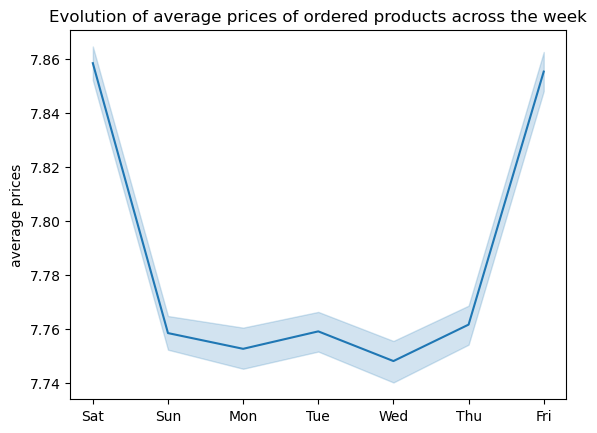

In [16]:
# creating line plot, and assigning it to a variable

line = sns.lineplot(data = df_line_plot, x = 'orders_day_of_week',y = 'prices')

#improving the cosmetics of the chart

line.set_xticks(range(7))
line.set_xticklabels(['Sat', 'Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri'])
line.set_xlabel('')
line.set_ylabel('average prices')
line.set_title('Evolution of average prices of ordered products across the week')

In [17]:
line.figure.savefig(os.path.join(vis_path, 'line_chart_prices_per_dow.png'))

In [18]:
#saving to pickle files the 30% and 70% slices, to be able to merge dataframes in the task ahead
df_small.to_pickle(os.path.join(prep_data_path, 'orders_products_sliced_30pc.pkl'))
df_big.to_pickle(os.path.join(prep_data_path, 'orders_products_sliced_70pc.pkl'))